In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0',"year","month"], inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

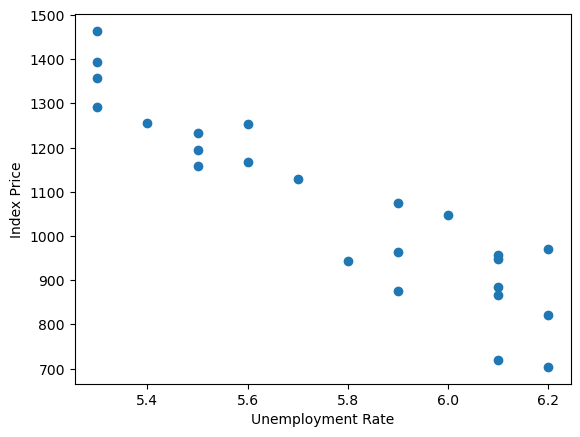

In [9]:
plt.scatter(df['unemployment_rate'],df['index_price'])
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price")
plt.show()

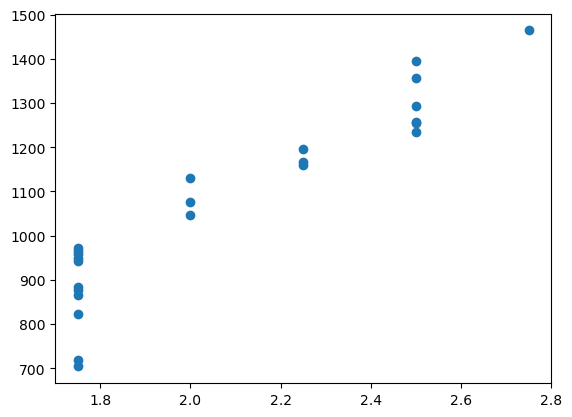

In [10]:
plt.scatter(df["interest_rate"],df['index_price'])

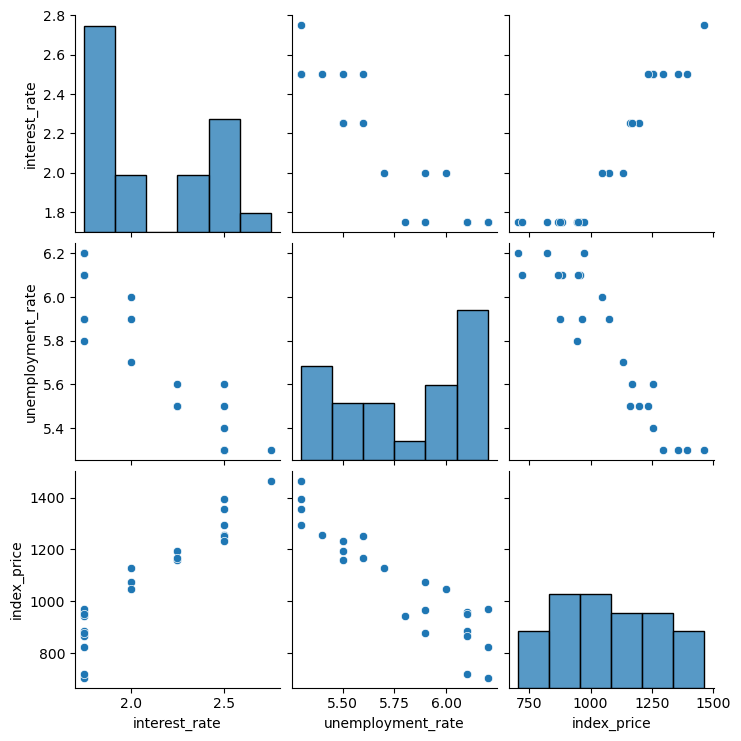

In [11]:
sns.pairplot(df)

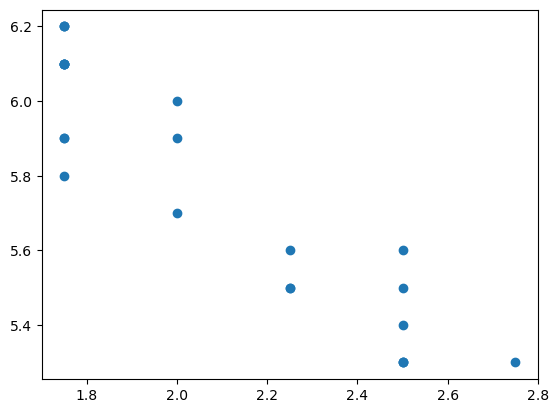

In [12]:
plt.scatter(df["interest_rate"],df["unemployment_rate"])

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: xlabel='interest_rate', ylabel='index_price'>

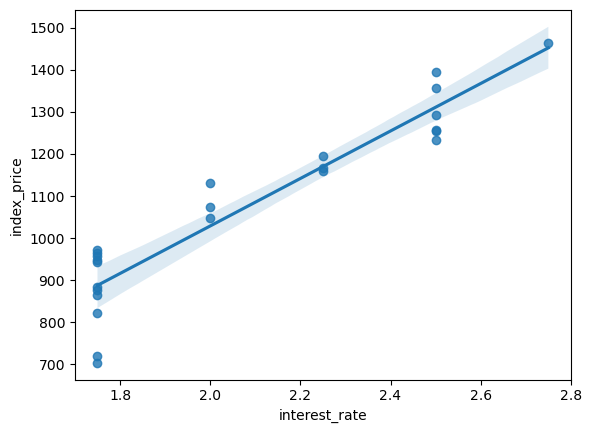

In [14]:
sns.regplot(x="interest_rate",y="index_price",data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

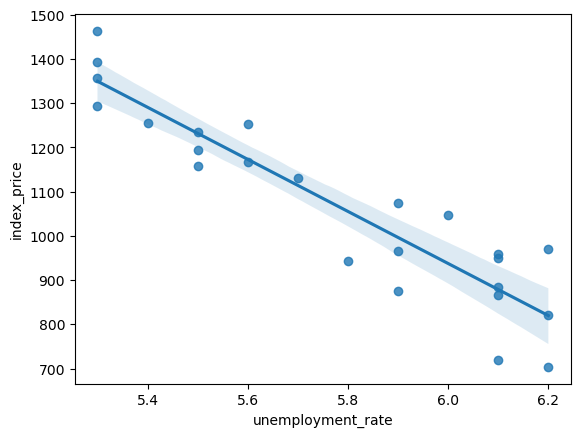

In [15]:
sns.regplot(x="unemployment_rate",y="index_price",data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

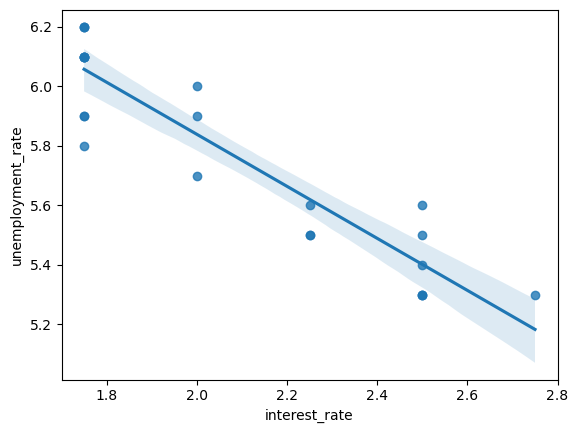

In [16]:
sns.regplot(x="interest_rate",y="unemployment_rate",data=df)

In [17]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(x_test)
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

MAE :  71.71878409976621
MSE :  6957.105303258827
RMSE :  83.4092638935198
R2 Score :  0.8254940547158577


In [22]:
# adjusted r2 score
1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6509881094317154

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=5,scoring='r2').mean()

-1.9162523516942813

### Assumptions

### Linearlity

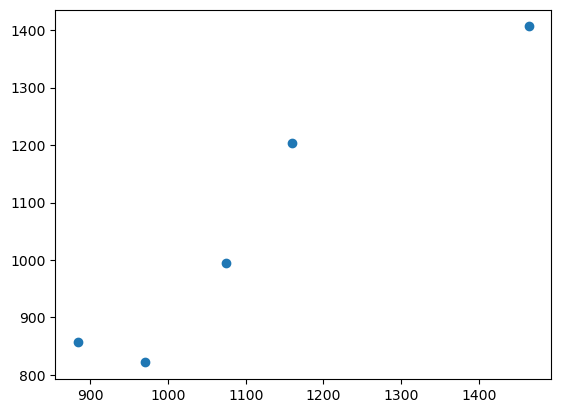

In [24]:
plt.scatter(y_test,y_pred)

### Normality of residual

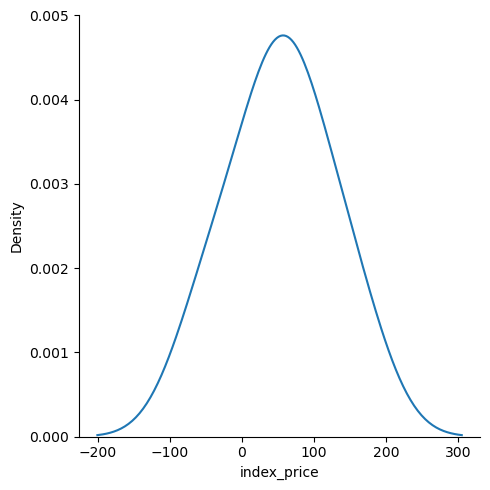

In [25]:
residuals = y_test - y_pred
sns.displot(residuals,kind='kde')

### Homoscadesity

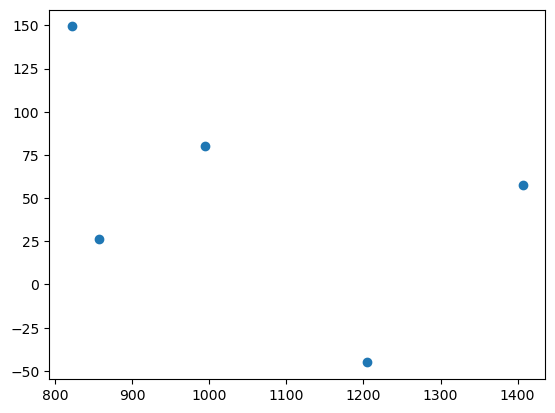

In [26]:
plt.scatter(y_pred,residuals)

### Autocorrelation

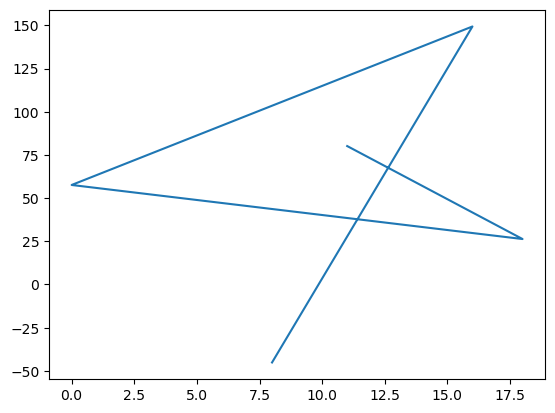

In [27]:
plt.plot(residuals)

In [28]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print("Durbin-Watson:", dw)

Durbin-Watson: 1.4412169575676073


### Check multicorrlinearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train, i))

In [30]:
pd.DataFrame({'vif': vif}, index=df.columns[0:2]).T

,interest_rate,unemployment_rate
vif,6.322025,6.322025


## OLS Method

In [32]:
import statsmodels.api as sm 
sm.OLS(y_train, x_train).fit().summary()

c:\Users\ghula\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                       0.751
Time:                        19:41:23   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""